<a href="https://colab.research.google.com/github/naokityokoyama/autoML/blob/main/ML_Pycaret.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

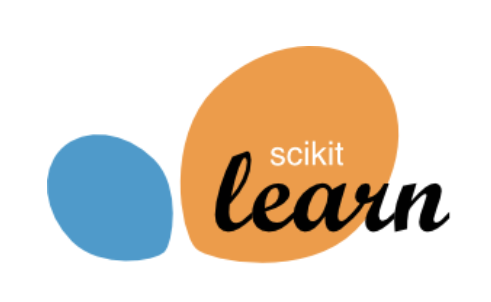

# Implementação Sklearn

In [1]:
!pip install scikit-learn==0.24.1
#!pip install scikit-learn==0.23.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 22.3 MB 8.5 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.23.2
    Uninstalling scikit-learn-0.23.2:
      Successfully uninstalled scikit-learn-0.23.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pycaret 2.3.10 requires scikit-learn==0.23.2, but you have scikit-learn 0.24.1 which is incompatible.


import lib

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, MinMaxScaler, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_validate, KFold
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings("ignore")

load database

In [3]:
base = pd.read_csv('/content/drive/MyDrive/Dataset/Churn_treino.csv', sep=';')

In [4]:
base.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,NaN,1,1,1,10134888,1
1,608,Spain,Female,41,1,838786.0,1,0,1,11254258,0
2,502,France,Female,42,8,159668.0,3,1,0,11393157,1
3,699,France,Female,39,1,NaN,2,0,0,9382663,0
4,850,Spain,Female,43,2,1255182.0,1,1,1,790841,0


In [ ]:
base.shape

(10000, 11)

In [ ]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          6383 non-null   float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  int64  
 10  Exited           10000 non-null  int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 859.5+ KB


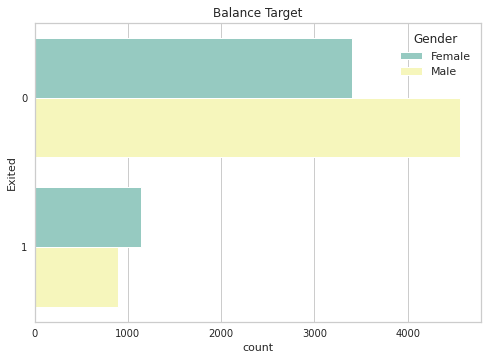

In [ ]:
plt.title('Balance Target')
sns.set_theme(style="darkgrid")
sns.countplot(data=base, y='Exited', hue='Gender', palette="Set3");

*    Doc https://imbalanced-learn.org/stable/index.html

In [6]:
X = base.drop(['Exited'], axis=1)
y = base.Exited

In [ ]:
# from imblearn.over_sampling import SMOTE
# X_resampled, y_resampled = SMOTE().fit_resample(X, y) #pipeline (X,y)

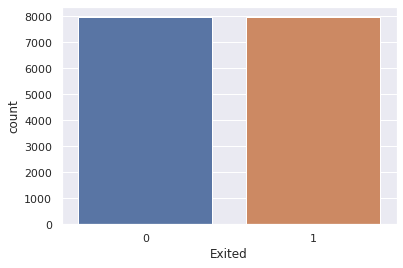

In [ ]:
#plot after smote
#sns.countplot(y_resampled)

Sep Categorical and Numeral features 

In [7]:
#Lista dataset categorias (numeral e categorical)

categoricalFeatures_list= list(set(X.select_dtypes(include='object').columns.values))
numericalFeatures_list = X.select_dtypes(exclude='object').columns.values

Create Pipeline

In [8]:
#definindo a estrategia NaN
numerical_transformer = SimpleImputer(strategy='median')

#definindo a estrategia categorical 
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

#preprocessamento
preprocessor = ColumnTransformer(
                transformers=[
                    ('num', numerical_transformer, numericalFeatures_list),
                    ('cat_nom', categorical_transformer, categoricalFeatures_list),
                    ])

#pipeline
pipe = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('minmaxscaler', MinMaxScaler()),
        ('stdscaler',  StandardScaler()),
#smote
        ('rf', RandomForestClassifier())
    
])

Train test Split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3, stratify=y)

Cross Validation

In [10]:
kfold = KFold(n_splits=5)
cv = cross_validate(pipe, X_train,y_train , cv=kfold, return_train_score=True , return_estimator=True)

In [11]:
cv['test_score'].mean()

0.8525714285714286

In [12]:
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

In [13]:
target_names=['class 0', 'class 1']
print (classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.88      0.96      0.92      2389
     class 1       0.75      0.47      0.58       611

    accuracy                           0.86      3000
   macro avg       0.81      0.71      0.75      3000
weighted avg       0.85      0.86      0.85      3000



Tunning

In [14]:
param_grid = {
    'rf__max_depth': [4, 5, 10],
    'rf__max_features': [2, 3, 4, 5],
    'rf__min_samples_leaf': [3, 4, 5, 6],
    'rf__n_estimators': [100, 200, 300]
}

In [15]:
gb = GridSearchCV(pipe, param_grid)

In [16]:
gb.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         SimpleImputer(strategy='median'),
                                                                         array(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary'], dtype=object)),
                                                                        ('cat_nom',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore

In [17]:
gb.best_params_

{'rf__max_depth': 10,
 'rf__max_features': 5,
 'rf__min_samples_leaf': 4,
 'rf__n_estimators': 100}

Confusion Matrix

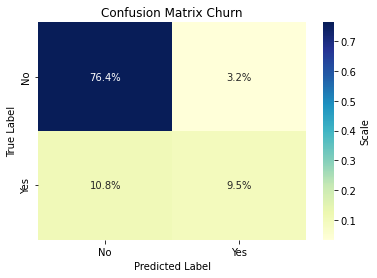

In [18]:
plt.title('Confusion Matrix Churn')
#labels = ['True Neg','False Pos','False Neg','True Pos']
#labels = np.asarray(labels).reshape(2,2)
cf_matrix = confusion_matrix(y_test, y_pred)

ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.1%', cmap="YlGnBu", cbar_kws={'label': 'Scale'})
ax.set(ylabel="True Label", xlabel="Predicted Label")
ax.set_xticklabels(['No', 'Yes'])
ax.set_yticklabels(['No', 'Yes']);

## outros modelo?



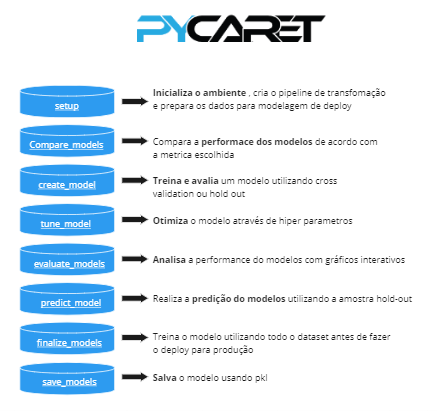

# Implementação Pycaret

*   doc
https://pycaret.readthedocs.io/en/latest/api/classification.html

In [2]:
#!pip install pycaret==2.3.10 markupsafe==2.0.1 pyyaml==5.4.1 -qq
!pip install pycaret --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached scikit_learn-0.23.2-cp37-cp37m-manylinux1_x86_64.whl (6.8 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.1
    Uninstalling scikit-learn-0.24.1:
      Successfully uninstalled scikit-learn-0.24.1


In [3]:
from pandas import read_csv as read
from pycaret.classification import setup ,compare_models, create_model
from pycaret.classification import tune_model, plot_model, evaluate_model, predict_model, finalize_model, save_model, load_model

/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [4]:
base = read('/content/drive/MyDrive/Dataset/Churn_treino.csv', sep=';')

In [5]:
#train test split
base_treinamento = base.sample(frac=0.7, random_state=3) 
base_teste= base.drop(base_treinamento.index)

In [5]:
base_treinamento.shape, base_teste.shape

((7000, 11), (3000, 11))

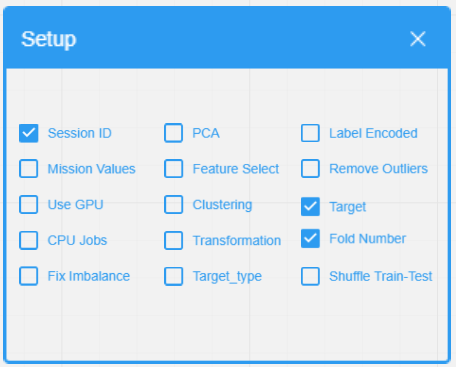

In [6]:
#setup
pipeline = setup(base_treinamento, target='Exited', session_id=3)

,Description,Value
0,session_id,3
1,Target,Exited
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(7000, 11)"
5,Missing Values,True
6,Numeric Features,4
7,Categorical Features,6
8,Ordinal Features,False
9,High Cardinality Features,False


In [7]:
#compare models 
pipeline = compare_models(sort='Accuracy', fold=5)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8520,0.8535,0.4430,0.7330,0.5517,0.4696,0.4912,0.592
ada,Ada Boost Classifier,0.8502,0.8363,0.4707,0.7038,0.5635,0.4775,0.4918,0.250
rf,Random Forest Classifier,0.8500,0.8369,0.4301,0.7304,0.5409,0.4585,0.4817,0.872
lightgbm,Light Gradient Boosting Machine,0.8473,0.8379,0.4697,0.6894,0.5584,0.4702,0.4830,0.186
lda,Linear Discriminant Analysis,0.8351,0.8272,0.3528,0.6971,0.4670,0.3821,0.4137,0.034
et,Extra Trees Classifier,0.8304,0.8039,0.3914,0.6455,0.4869,0.3927,0.4105,0.772
ridge,Ridge Classifier,0.8291,0.0000,0.2567,0.7513,0.3819,0.3095,0.3703,0.020
lr,Logistic Regression,0.7940,0.5070,0.0000,0.0000,0.0000,0.0000,0.0000,1.094
nb,Naive Bayes,0.7940,0.5549,0.0000,0.0000,0.0000,0.0000,0.0000,0.046
qda,Quadratic Discriminant Analysis,0.7940,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.032


More setup

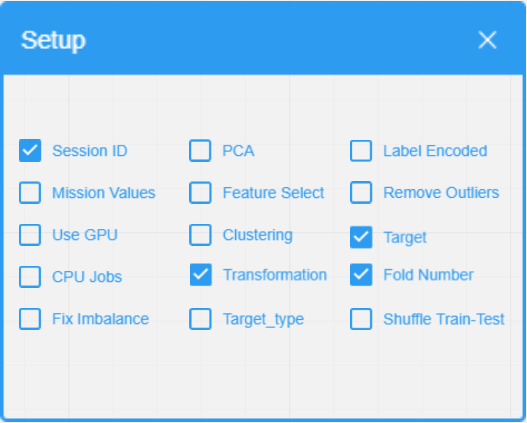

In [31]:
pipeline = setup(data=base, target='Exited', session_id=1, 
                    numeric_features=['Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember'],
                 fold=5)

,Description,Value
0,session_id,1
1,Target,Exited
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(10000, 11)"
5,Missing Values,True
6,Numeric Features,8
7,Categorical Features,2
8,Ordinal Features,False
9,High Cardinality Features,False


Another Setup

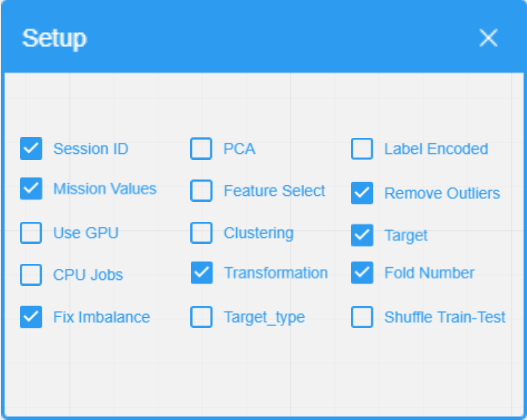

In [10]:
pipeline = setup(data=base, target='Exited', session_id=1, 
                    numeric_features=['Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember'], 
                    combine_rare_levels=True, rare_level_threshold=0.25,
                    numeric_imputation='median', 
                    fix_imbalance = True,
                    fold=5)

,Description,Value
0,session_id,1
1,Target,Exited
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(10000, 11)"
5,Missing Values,True
6,Numeric Features,8
7,Categorical Features,2
8,Ordinal Features,False
9,High Cardinality Features,False


In [8]:
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8490,0.8273,0.4653,0.7015,0.5595,0.4729,0.4874
1,0.8469,0.8284,0.4257,0.7167,0.5342,0.4496,0.4714
2,0.8327,0.8161,0.4257,0.6418,0.5119,0.4159,0.4286
3,0.8490,0.8115,0.3960,0.7547,0.5195,0.4400,0.4723
4,0.8735,0.8903,0.5446,0.7746,0.6395,0.5656,0.5785
5,0.8531,0.8632,0.4455,0.7377,0.5556,0.4739,0.4955
6,0.8592,0.8515,0.4653,0.7581,0.5767,0.4980,0.5193
7,0.8429,0.8350,0.3663,0.7400,0.4901,0.4095,0.4449
8,0.8510,0.8087,0.3762,0.7917,0.5101,0.4350,0.4770


In [34]:
print (rf)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)


Fining Tunning

In [11]:
rf_tuning = tune_model(rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8414,0.8430,0.5390,0.6230,0.5779,0.4809,0.4829
1,0.8414,0.8333,0.4823,0.6415,0.5506,0.4567,0.4635
2,0.8257,0.8072,0.5213,0.5742,0.5465,0.4389,0.4397
3,0.8307,0.8319,0.5638,0.5824,0.5730,0.4674,0.4675
4,0.8370,0.8370,0.4291,0.6436,0.5149,0.4216,0.4341
Mean,0.8353,0.8305,0.5071,0.6129,0.5526,0.4531,0.4576
Std,0.0062,0.0122,0.0472,0.0293,0.0225,0.0209,0.0181


In [36]:
#tunning personal 
param_grid = {
    'max_depth': [4, 5, 10],
    'max_features': [2, 3, 4, 5],
    'min_samples_leaf': [3, 4, 5, 6],
    'n_estimators': [100, 200, 300]
            }

rf_tuning = tune_model(rf, custom_grid=param_grid)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8629,0.8606,0.5496,0.7045,0.6175,0.5355,0.5417
1,0.8493,0.8475,0.5071,0.6651,0.5755,0.4858,0.4925
2,0.8414,0.8271,0.4787,0.6429,0.5488,0.4551,0.4624
3,0.8557,0.8511,0.5603,0.6695,0.6100,0.5224,0.5255
4,0.8528,0.8529,0.4433,0.7184,0.5482,0.4661,0.4855
Mean,0.8524,0.8478,0.5078,0.6801,0.5800,0.4930,0.5015
Std,0.0071,0.0112,0.0436,0.0275,0.0294,0.0313,0.0285


In [12]:
print (rf_tuning)

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight={},
                       criterion='entropy', max_depth=6, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.002, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=40, n_jobs=-1,
                       oob_score=False, random_state=3, verbose=0,
                       warm_start=False)


Grafico

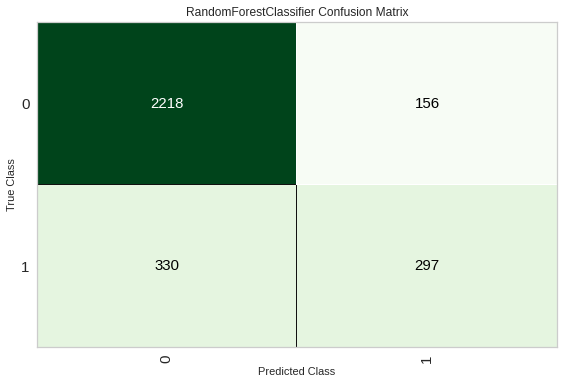

In [13]:
plot_model(rf_tuning, plot='confusion_matrix')


In [14]:
#mix grafico
evaluate_model(rf_tuning)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

Previsão do modelo e Salve/Load

In [15]:
rf_final = finalize_model(rf_tuning)
save_model(rf_final, 'randomForest')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=['Tenure',
                                                           'NumOfProducts',
                                                           'HasCrCard',
                                                           'IsActiveMember'],
                                       target='Exited', time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_cat...
                  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                                         class_weight={}, criterion='entropy',
          

Load

In [16]:
load_rf = load_model('/content/randomForest')

Transformation Pipeline and Model Successfully Loaded


Previsoes

In [18]:
previsoes = predict_model(load_rf, data=base_teste)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.8443,0.8393,0.5133,0.6398,0.5696,0.476,0.4803


In [19]:
previsoes

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Label,Score
3,699,France,Female,39,1,NaN,2,0,0,9382663,0,0,0.7831
5,645,Spain,Male,44,8,11375578.0,2,1,0,14975671,1,0,0.5971
7,376,Germany,Female,29,4,1154674.0,4,1,0,11934688,1,1,0.6946
11,497,Spain,Male,24,3,NaN,2,1,0,7639001,0,0,0.8745
12,476,France,Female,34,10,NaN,2,1,0,2626098,0,0,0.8073
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,841,Spain,Male,28,4,NaN,2,1,1,1794366,0,0,0.9068
9991,597,France,Female,53,4,8838121.0,1,1,0,6938471,1,1,0.6776
9995,771,France,Male,39,5,NaN,2,1,0,9627064,0,0,0.8511
9998,772,Germany,Male,42,3,757531.0,2,1,0,9288852,1,1,0.5088
